# DATA 534: Lab 1
## General Lab Instructions

- This assignment is to be completed in python, submitting both a `.ipynb` file (you can add your answers directly to this one) along with a rendered `.md`.
- The demo we saw in class will help you with the basics for this lab. 

# Exercise 1: Creating a prerequisite diagram (5 marks)

Below is a prerequisite chart for the graduate DATA courses:

<img src="MDS-prereq.png" style="width:90%"/>

In this assignment, you will reproduce this graph, or something very similar, by scraping the prerequisite info from https://courses.students.ubc.ca/cs/courseschedule?tname=subj-department&campuscd=UBCO&dept=DATA&pname=subjarea. Note that you might need to append '&campuscd=UBCO' to the end of the URL string for the course pages to display properly 
(eg. https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=DATA&course=101&campuscd=UBCO).

Try loading webpages in a incognito browser window to see the page that the python code will recieve. 

In this assignment, you will implement a simple crawler to crawl and scrape UBC SSC web pages just for grad courses. Grad courses start with 5. 

HINTS: 
    1. Your broser's developer tools is your ally in navigating a web structure.
    2. use `BeautifulSoup` to create a object from the web page
    3. Use `graphviz` to draw the graph


In [15]:
from bs4 import BeautifulSoup
import requests
import graphviz
import pandas as pd

In [ ]:
dong run Q1

In [2]:
# TODO: Request the URL (1 mark)
UBCO_url = 'https://courses.students.ubc.ca/cs/courseschedule?tname=subj-department&campuscd=UBCO&dept=DATA&pname=subjarea'
ubco_request = requests.get(UBCO_url)
if ubco_request.status_code == 200:
      print('URL loaded correctly')

# TODO: Create BeautifulSoup object (1 mark)
soup = BeautifulSoup(ubco_request.content, 'html.parser')
# TODO: Get courses (1 mark)
grad_courses = soup.find_all('a')

Grad_courses_url = {}

for course in grad_courses:
      if course.text.startswith("DATA 5"):
            # print(course.text)
            Grad_courses_url[course.text] = 'https://courses.students.ubc.ca'+course['href'] + "&campuscd=UBCO"

URL loaded correctly


In [3]:
Grad_courses_url

# https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=DATA&course=585

{'DATA 505': 'https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=DATA&course=505&campuscd=UBCO',
 'DATA 530': 'https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=DATA&course=530&campuscd=UBCO',
 'DATA 531': 'https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=DATA&course=531&campuscd=UBCO',
 'DATA 532': 'https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=DATA&course=532&campuscd=UBCO',
 'DATA 533': 'https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=DATA&course=533&campuscd=UBCO',
 'DATA 534': 'https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=DATA&course=534&campuscd=UBCO',
 'DATA 540': 'https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=DATA&course=540&campuscd=UBCO',
 'DATA 541': 'https://courses.students.ubc.ca/cs/courseschedul

In [4]:
print(Grad_courses_url['DATA 550'])
# https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=DATA&course=550

https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=DATA&course=550&campuscd=UBCO


In [5]:
pre_request = {}
for i in Grad_courses_url:
      name = i
      # print('find the pre-request for: ',i)
      pre =[]
      course_url = Grad_courses_url[i]
      course_page = requests.get(course_url)
      soup = BeautifulSoup(course_page.content)
      Data = soup.find_all('p')
      # print('pre_request courses: \n')
      for item in Data:
            if item.text.startswith("Pre-reqs:"):
                  for i in item.find_all('a'):
                        c = i.text
                        pre.append(c)
                        
      # print(pre)
      # print("---")
      pre_request[name] = pre

In [6]:
pre_request

{'DATA 505': [],
 'DATA 530': [],
 'DATA 531': [],
 'DATA 532': [],
 'DATA 533': ['DATA 532'],
 'DATA 534': [],
 'DATA 540': ['DATA 531'],
 'DATA 541': [],
 'DATA 542': ['DATA 532', 'DATA 540', 'DATA 541'],
 'DATA 543': ['DATA 540', 'DATA 570'],
 'DATA 550': ['DATA 530', 'DATA 531'],
 'DATA 551': ['DATA 534', 'DATA 543', 'DATA 550'],
 'DATA 552': [],
 'DATA 553': [],
 'DATA 570': ['DATA 580'],
 'DATA 571': ['DATA 570'],
 'DATA 572': ['DATA 571'],
 'DATA 573': ['DATA 572'],
 'DATA 580': [],
 'DATA 581': ['DATA 580'],
 'DATA 582': ['DATA 572', 'DATA 581'],
 'DATA 583': ['DATA 572', 'DATA 581'],
 'DATA 585': ['DATA 580'],
 'DATA 586': ['DATA 580'],
 'DATA 589': ['DATA 543']}

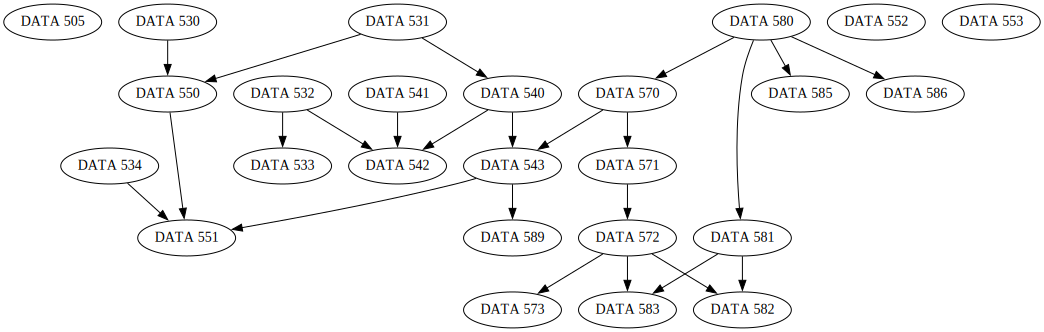

In [14]:
# TODO: Make graph and export it to pdf (1 mark)
g = graphviz.Digraph('Data Science Classes', filename= 'DATA.gv')


for key, value in pre_request.items():
      if len(value)!=0:
            for prereq in value:
                  g.edge(prereq, key)
      else:
            g.node(key)
            
g


# Exercise 2: Creating a prerequisite diagram using Scrapy (5 marks)

In this exercise, you will implement a simple crawler, using Scrapy, to crawl and scrape UBCO web pages to grab the prerequisite chart for the graduate DATA courses. You should generate the same graph as in Exercise 1.

## Python instructions

You can install Scrapy with `conda install scrapy` or `pip install scrapy`. Here is a link to [scrapy documentation](http://doc.scrapy.org/en/latest/). Additionally, you will need to install `html5lib` and `json` packages.

## Writing your own crawler

This exercise is broken into the following steps:

### Step 1: Creating the crawler folder structure

You will use Scrapy's built in command to generate the crawler folder structure. In the command line (using interfaces such as Terminal in OS X), type `scrapy startproject prereq_project`.

This will generate a directory named prereq_project under your current directory.

### Step 2: Implementing your first scraper

Create a new python file, name it `spider.py` and save it under prereq_project/spiders/ directory. You may fill in the file with the code below:

```
import scrapy
import html5lib
from bs4 import BeautifulSoup

class MySpider(scrapy.Spider):

    name = "mySpider"
    allowed_domains = ["ubc.ca"]
    start_urls = [
        "https://courses.students.ubc.ca/cs/courseschedule?tname=subj-department&campuscd=UBCO&dept=DATA&pname=subjarea"
    ]
    custom_settings = {
        'USER_AGENT': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36',
    }

    def __init__(self):
        self.log_file = open('log_file', 'w')

    def parse(self, response):
      soup = BeautifulSoup(response.text, 'html5lib')
      return

    def parse_course_details(self, response):
        pass
```
The spider requires specification of the name, domain that it is allowed to crawl, and a list of URLs from which the spider is to begin crawling. You can run the crawler with the following command (although it will do nothing):

`scrapy crawl mySpider`

The scrapy crawler works by sending an HTTP request for each URL in the start_urls field. Once it receives a response, the default callback function, parse(response), is invoked with a [Response](http://doc.scrapy.org/en/1.6/topics/request-response.html#scrapy.http.Response) object passed into the function.

Your task in this step is to complete the implementation of the parse(response) function so that you can retrieve the list of all data science courses (DATA 5XX) as well as the links to the course details. The first step of creating a BeautifulSoup object, soup to parse the response has been completed for you.

We recommend you to use `self.log_file` to output the list of courses that you retrieved -- this will be helpful as you debug your code.

### Step 3: Structuring the scraped data

Scrapy provides a mechanism for structuring the scraped data using [Items](http://doc.scrapy.org/en/1.6/topics/items.html).

You will define your own Item class by subclassing Scrapy's Item class. Open prereq_project/items.py. The file contains a simple definition of TestItem class. You may rename the class to CourseItem.

Item class comes with a default [Field](http://doc.scrapy.org/en/1.6/topics/items.html#scrapy.item.Field) object, which is essentially a Python dictionary. We want to declare at least two fields: `course_name` and `url_link`.

Now, modify the `spider.py`, in particular, parse(response) function to use `CourseItem class` and store the course name and the links in the fields that you just created. Once you are done, run the crawler via the command,

`scrapy crawl mySpider -o courses.json`

Check the `courses.json` file to ensure that your implementation is correct.

### Step 4: Crawling the link

To retrieve the prerequisite for each of the courses, you will need to follow the links associated with each of the courses. This requires you to make an HTTP [Request](http://doc.scrapy.org/en/1.6/topics/request-response.html#request-objects).

Your task here is to make an HTTP request on each of the links for each of the courses that you retrieved from Steps 2 and 3, and fill out the second callback function, `parse_course_details(response)`, to retrieve the prerequisities for each of the courses.

Output the retrieved course pre-requisite to the `courses.json` file. Note that you will have to change `items.py` file as you will need to store the list of prerequisite courses.

### Step 5. Generate the graphs

Use the [Python wrapper](https://pypi.python.org/pypi/graphviz) around [graphviz](http://www.graphviz.org/) to turn this into a picture. You should have graphviz but you may need to install the Python wrapper, which can be achieved with conda install graphviz.

### Step 6: Submit the code in canvas

Zip the entire project and submit the code. Make sure that we can run your code by running from our command line:

`scrapy crawl mySpider -o courses.json`

# Exercise 3 (5 marks)

All the Game of Thrones episodes are listed, by season, in the following URL: https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes

Unfortunately, the running time of each episode is not available. However, in the link provided for each episodes (e.g., https://en.wikipedia.org/wiki/Dragonstone_(Game_of_Thrones)) there is the running time of the respective episode. Collect the episodes' titles, season, number of U.S. viewers, and running time from wikipedia and create a pandas dataframe with the information collected.

In [113]:
url = 'https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
tds_number = soup.find_all('table', {'class':'wikitable'})

len(tds_number)
# 1st, 11th, 12th, 13th do not count as the number of episodes
# the info for each episodes is contained in table 2nd to 9th

12

In [114]:
title_list = []
season_list = []
viewers_list = []
links_list = []
home_url = 'https://en.wikipedia.org'
for n in range(1, 9):
      for i, j in enumerate(tds_number[n].find_all('td')):
            # print(i)
            # print(j)
            if (i+1)%6 ==2:
                  title = j.text
                  season = n
                  link = home_url + j.find_all('a')[0]['href']
                  title_list.append(title)
                  season_list.append(season)
                  links_list.append(link)
            if (i+1)%6 == 0:
                  viewer_number = j.text[:-4]
                  viewers_list.append(viewer_number)            

In [115]:
time_list = []
for i in links_list:
      url_request = requests.get(i)
      page = BeautifulSoup(url_request.text)
      # find the first table in each page of episode
      table = page.find_all('table')[0]
      for item in table.find_all('td', {'class':"infobox-data"}):
            # print(item.text)
            if 'minutes' in item.text:
                  time = item.text[:2]
                  time_list.append(time)

In [116]:
# time_list = int(time_list)
running_time = []
number_viewer = []
for i in time_list:
      time = int(i)
      running_time.append(time)
for i in viewers_list:
      n = float(i)
      number_viewer.append(n)

In [117]:
print(title_list[:3])
print(season_list[:3])
print(number_viewer[:3])
print(links_list[:3])
print(running_time[:3])

['"Winter Is Coming"', '"The Kingsroad"', '"Lord Snow"']
[1, 1, 1]
[2.22, 2.2, 2.44]
['https://en.wikipedia.org/wiki/Winter_Is_Coming', 'https://en.wikipedia.org/wiki/The_Kingsroad', 'https://en.wikipedia.org/wiki/Lord_Snow']
[61, 55, 57]


In [118]:
df = pd.DataFrame(list(zip(title_list, season_list, number_viewer, running_time)), 
            columns = ['Titles', 'Season', 'Number of U.S. viewers (millions)', 'Running time (minutes)'])

In [120]:
df.head()

,Titles,Season,Number of U.S. viewers (millions),Running time (minutes)
0,"""Winter Is Coming""",1,2.22,61
1,"""The Kingsroad""",1,2.20,55
2,"""Lord Snow""",1,2.44,57
3,"""Cripples, Bastards, and Broken Things""",1,2.45,55
4,"""The Wolf and the Lion""",1,2.58,54


In [121]:
df.tail()

,Titles,Season,Number of U.S. viewers (millions),Running time (minutes)
68,"""A Knight of the Seven Kingdoms""",8,10.29,57
69,"""The Long Night""",8,12.02,81
70,"""The Last of the Starks""",8,11.80,77
71,"""The Bells""",8,12.48,77
72,"""The Iron Throne""",8,13.61,78
